<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Precipitation


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls /content/drive/My\ Drive/cmpe256-data

County_codes.csv    PrecipitationSensor-County.csv  uw-supplier-data-2.csv
MR		    reservoir2.csv		    water-usage-data.csv
outflow2.csv	    ReservoirSensor-County.csv	    water-usage-data.gsheet
outflow2.gsheet     snow2.csv
precepitation2.csv  SnowSensor-county.csv


In [4]:
precipitation = pd.read_csv('/content/drive/My Drive/cmpe256-data/precepitation2.csv',low_memory=False)
precipitation.head()

,Sensor,Date,Value
0,29P,200501,1.14
1,29P,200502,3.19
2,29P,200503,0.06
3,29P,200504,0.00
4,29P,200505,0.00


In [5]:
precipitation['DateTime'] = pd.to_datetime(precipitation['Date'],format='%Y%m')
precipitation['Year'] = pd.to_datetime(precipitation['Date'],format='%Y%m').dt.year
precipitation['Month'] = pd.to_datetime(precipitation['Date'],format='%Y%m').dt.month
precipitation.head()

,Sensor,Date,Value,DateTime,Year,Month
0,29P,200501,1.14,2005-01-01,2005,1
1,29P,200502,3.19,2005-02-01,2005,2
2,29P,200503,0.06,2005-03-01,2005,3
3,29P,200504,0.00,2005-04-01,2005,4
4,29P,200505,0.00,2005-05-01,2005,5


In [6]:
country_precipitation = pd.read_csv('/content/drive/My Drive/cmpe256-data/PrecipitationSensor-County.csv',low_memory=False)
country_precipitation.head()

,Station,County
0,CCC,'DEL NORTE'
1,CRE,'DEL NORTE'
2,GAS,'DEL NORTE'
3,CEC,'DEL NORTE'
4,OAR,'HUMBOLDT'


In [0]:
country_precipitation['Station'].unique()
country_precipitation['Station'] = country_precipitation['Station'].apply(lambda x: x.strip())

In [0]:
merged_precipitation = pd.merge(precipitation,country_precipitation,how='inner', left_on='Sensor', right_on='Station')

In [9]:
merged_precipitation.County = merged_precipitation['County'].apply(lambda x: x.strip().replace('\'',''))
merged_precipitation.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County
0,29P,200501,1.14,2005-01-01,2005,1,29P,SAN BERNARDINO
1,29P,200502,3.19,2005-02-01,2005,2,29P,SAN BERNARDINO
2,29P,200503,0.06,2005-03-01,2005,3,29P,SAN BERNARDINO
3,29P,200504,0.00,2005-04-01,2005,4,29P,SAN BERNARDINO
4,29P,200505,0.00,2005-05-01,2005,5,29P,SAN BERNARDINO


In [10]:
merged_precipitation.County.unique()

array(['SAN BERNARDINO', 'TULARE', 'FRESNO', 'MODOC', 'ORANGE', 'NAPA',
       'PLACER', 'BUTTE', 'LOS ANGELES', 'MONO', 'KERN', 'TRINITY',
       'MONTEREY', 'INYO', 'RIVERSIDE', 'PLUMAS', 'HUMBOLDT', 'SISKIYOU',
       'YUBA', 'SANTA BARBARA', 'DEL NORTE', 'LAKE', 'MENDOCINO',
       'CALAVERAS', 'ALPINE', 'MADERA', 'SANTA CRUZ', 'SAN DIEGO',
       'TUOLUMNE', 'MARIPOSA', 'SACRAMENTO', 'SIERRA', 'LASSEN', 'COLUSA',
       'AMADOR', 'SOLANO', 'SONOMA', 'SHASTA', 'EL DORADO', 'SAN BENITO',
       'SANTA CLARA', 'KINGS', 'IMPERIAL', 'MARIN', 'MERCED',
       'STANISLAUS', 'TEHAMA', 'SUTTER', 'GLENN', 'VENTURA',
       'SAN LUIS OBISPO', 'SAN MATEO', 'SAN JOAQUIN', 'YOLO'],
      dtype=object)

In [11]:
 merged_precipitation.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County
0,29P,200501,1.14,2005-01-01,2005,1,29P,SAN BERNARDINO
1,29P,200502,3.19,2005-02-01,2005,2,29P,SAN BERNARDINO
2,29P,200503,0.06,2005-03-01,2005,3,29P,SAN BERNARDINO
3,29P,200504,0.00,2005-04-01,2005,4,29P,SAN BERNARDINO
4,29P,200505,0.00,2005-05-01,2005,5,29P,SAN BERNARDINO


In [0]:
filtered_precipitation = merged_precipitation[(merged_precipitation['Year'] == 2017) & (merged_precipitation['County'] == 'SIERRA')]
filtered_precipitation.set_index('DateTime',inplace=True)

In [13]:
filtered_precipitation

,Sensor,Date,Value,Year,Month,Station,County
DateTime,,,,,,,
2017-01-01,DWV,201701,0.00,2017,1,DWV,SIERRA
2017-01-01,DWV,201701,0.00,2017,1,DWV,SIERRA
2017-01-01,DWV,201701,4.38,2017,1,DWV,SIERRA
2017-01-01,DWV,201701,0.74,2017,1,DWV,SIERRA
2017-01-01,DWV,201701,0.00,2017,1,DWV,SIERRA
...,...,...,...,...,...,...,...
2017-12-01,SRR,201712,0.00,2017,12,SRR,SIERRA
2017-12-01,SRR,201712,0.00,2017,12,SRR,SIERRA
2017-12-01,SRR,201712,0.00,2017,12,SRR,SIERRA


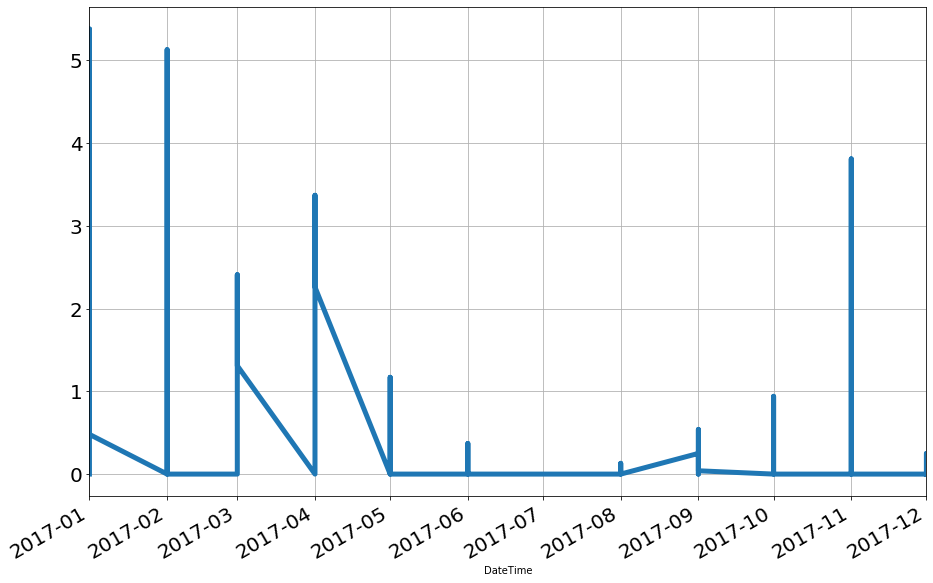

In [14]:
filtered_precipitation['Value'].plot(figsize=(15,10), linewidth=5, fontsize=20, grid=True)



# **Snow**

In [15]:
snow = pd.read_csv('/content/drive/My Drive/cmpe256-data/snow2.csv',low_memory=False)
snow.head()

,Sensor,Date,Value
0,ADM,200501,10.0
1,ADM,200502,8.3
2,ADM,200503,10.9
3,ADM,200504,2.5
4,ADM,200505,0.0


In [16]:
snow['DateTime'] = pd.to_datetime(snow['Date'],format='%Y%m')
snow['Year'] = pd.to_datetime(snow['Date'],format='%Y%m').dt.year
snow['Month'] = pd.to_datetime(snow['Date'],format='%Y%m').dt.month
snow.head()

,Sensor,Date,Value,DateTime,Year,Month
0,ADM,200501,10.0,2005-01-01,2005,1
1,ADM,200502,8.3,2005-02-01,2005,2
2,ADM,200503,10.9,2005-03-01,2005,3
3,ADM,200504,2.5,2005-04-01,2005,4
4,ADM,200505,0.0,2005-05-01,2005,5


In [17]:
county_snow = pd.read_csv('/content/drive/My Drive/cmpe256-data/SnowSensor-county.csv',low_memory=False)
county_snow['Station'] = county_snow['Station'].apply(lambda x: x.strip())
county_snow.head()

,Station,County
0,CWF,'MODOC'
1,MB3,'SISKIYOU'
2,SCT,'SISKIYOU'
3,PET,'TRINITY'
4,RRM,'TRINITY'


In [18]:
merged_snow = pd.merge(snow,county_snow,how='inner', left_on='Sensor', right_on='Station')
merged_snow.County = merged_snow['County'].apply(lambda x: x.strip().replace('\'',''))
merged_snow.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County
0,ADM,200501,10.0,2005-01-01,2005,1,ADM,MODOC
1,ADM,200502,8.3,2005-02-01,2005,2,ADM,MODOC
2,ADM,200503,10.9,2005-03-01,2005,3,ADM,MODOC
3,ADM,200504,2.5,2005-04-01,2005,4,ADM,MODOC
4,ADM,200505,0.0,2005-05-01,2005,5,ADM,MODOC


In [0]:
filtered_snow = merged_snow[(merged_snow['Year'] == 2012) & (merged_snow['County'] == 'FRESNO')]
filtered_snow.set_index('DateTime',inplace=True)

In [20]:
merged_snow[(merged_snow['County'] == 'FRESNO')]

,Sensor,Date,Value,DateTime,Year,Month,Station,County
533,BCB,201910,0.00,2019-10-01,2019,10,BCB,FRESNO
534,BCB,200501,34.30,2005-01-01,2005,1,BCB,FRESNO
535,BCB,200502,39.11,2005-02-01,2005,2,BCB,FRESNO
536,BCB,200503,46.30,2005-03-01,2005,3,BCB,FRESNO
537,BCB,200504,47.11,2005-04-01,2005,4,BCB,FRESNO
...,...,...,...,...,...,...,...,...
21017,WWC,201906,0.00,2019-06-01,2019,6,WWC,FRESNO
21018,WWC,201907,0.00,2019-07-01,2019,7,WWC,FRESNO
21019,WWC,201908,0.00,2019-08-01,2019,8,WWC,FRESNO
21020,WWC,201909,0.00,2019-09-01,2019,9,WWC,FRESNO


,Sensor,Date,Value,Year,Month,Station,County
DateTime,,,,,,,
2012-01-01,BCB,201201,0.0,2012,1,BCB,FRESNO
2012-02-01,BCB,201202,0.0,2012,2,BCB,FRESNO
2012-03-01,BCB,201203,0.0,2012,3,BCB,FRESNO
2012-04-01,BCB,201204,0.0,2012,4,BCB,FRESNO
2012-05-01,BCB,201205,0.0,2012,5,BCB,FRESNO
...,...,...,...,...,...,...,...
2012-08-01,WWC,201208,0.0,2012,8,WWC,FRESNO
2012-09-01,WWC,201209,0.0,2012,9,WWC,FRESNO
2012-10-01,WWC,201210,0.0,2012,10,WWC,FRESNO


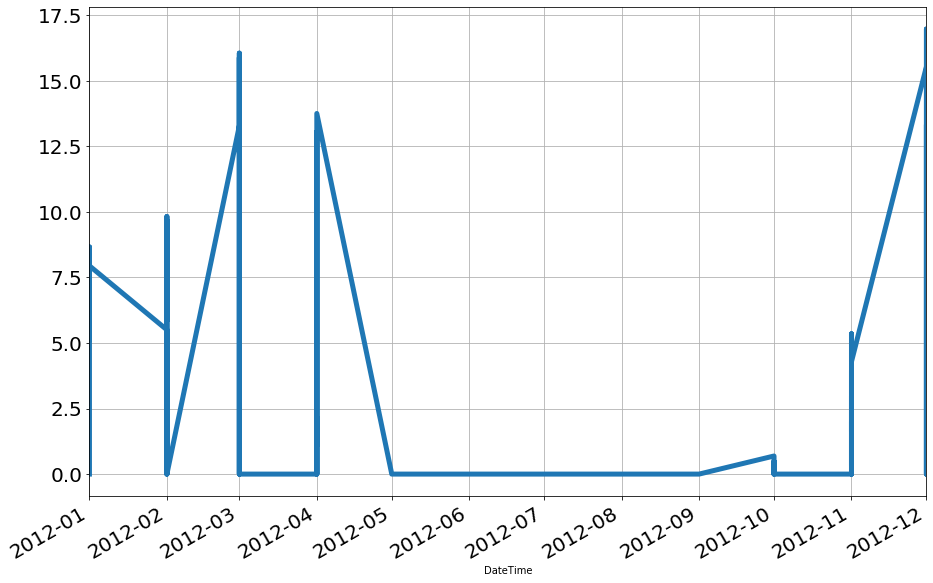

In [21]:
filtered_snow['Value'].plot(figsize=(15,10), linewidth=5, fontsize=20, grid=True)
filtered_snow


# **Reservoir**

In [22]:
reservoir = pd.read_csv('/content/drive/My Drive/cmpe256-data/reservoir2.csv',low_memory=False)
reservoir.head()

,Sensor,Date,Value
0,ALM,200501,733949.00
1,ALM,200502,751681.00
2,ALM,200503,817963.00
3,ALM,200504,869453.00
4,ALM,200505,998749.00


In [23]:
reservoir['DateTime'] = pd.to_datetime(reservoir['Date'],format='%Y%m')
reservoir['Year'] = pd.to_datetime(reservoir['Date'],format='%Y%m').dt.year
reservoir['Month'] = pd.to_datetime(reservoir['Date'],format='%Y%m').dt.month
reservoir.head()

,Sensor,Date,Value,DateTime,Year,Month
0,ALM,200501,733949.00,2005-01-01,2005,1
1,ALM,200502,751681.00,2005-02-01,2005,2
2,ALM,200503,817963.00,2005-03-01,2005,3
3,ALM,200504,869453.00,2005-04-01,2005,4
4,ALM,200505,998749.00,2005-05-01,2005,5


In [24]:
country_reservoir = pd.read_csv('/content/drive/My Drive/cmpe256-data/PrecipitationSensor-County.csv',low_memory=False)
country_reservoir.head()

,Station,County
0,CCC,'DEL NORTE'
1,CRE,'DEL NORTE'
2,GAS,'DEL NORTE'
3,CEC,'DEL NORTE'
4,OAR,'HUMBOLDT'


In [0]:
country_reservoir['Station'] = country_reservoir['Station'].apply(lambda x: x.strip())

In [26]:
merged_reservoir = pd.merge(reservoir,country_reservoir,how='inner', left_on='Sensor', right_on='Station')
merged_reservoir.head()

,Sensor,Date,Value,DateTime,Year,Month,Station,County
0,BRT,200501,14884.00,2005-01-01,2005,1,BRT,'SAN DIEGO'
1,BRT,200502,21960.00,2005-02-01,2005,2,BRT,'SAN DIEGO'
2,BRT,200503,27268.00,2005-03-01,2005,3,BRT,'SAN DIEGO'
3,BRT,200504,29144.00,2005-04-01,2005,4,BRT,'SAN DIEGO'
4,BRT,200505,29950.00,2005-05-01,2005,5,BRT,'SAN DIEGO'


In [27]:
merged_reservoir.County = merged_reservoir['County'].apply(lambda x: x.strip().replace('\'',''))
merged_reservoir['Value'] = merged_reservoir['Value'].apply(lambda x: x.strip())
merged_reservoir['Value'] = merged_reservoir['Value'].str.extract('(\d+)', expand=False)
merged_reservoir['Value'] = merged_reservoir['Value'].astype(float)
print(merged_reservoir.dtypes)
merged_reservoir.head()

Sensor              object
Date                 int64
Value              float64
DateTime    datetime64[ns]
Year                 int64
Month                int64
Station             object
County              object
dtype: object


,Sensor,Date,Value,DateTime,Year,Month,Station,County
0,BRT,200501,14884.0,2005-01-01,2005,1,BRT,SAN DIEGO
1,BRT,200502,21960.0,2005-02-01,2005,2,BRT,SAN DIEGO
2,BRT,200503,27268.0,2005-03-01,2005,3,BRT,SAN DIEGO
3,BRT,200504,29144.0,2005-04-01,2005,4,BRT,SAN DIEGO
4,BRT,200505,29950.0,2005-05-01,2005,5,BRT,SAN DIEGO


In [28]:
filtered_reservoir = merged_reservoir[(merged_reservoir['Year'] == 2017) & (merged_reservoir['County'] == 'FRESNO')]
filtered_reservoir.set_index('DateTime',inplace=True)
filtered_reservoir.head()

,Sensor,Date,Value,Year,Month,Station,County
DateTime,,,,,,,
2017-01-01,FLR,201701,10908.0,2017,1,FLR,FRESNO
2017-02-01,FLR,201702,5693.0,2017,2,FLR,FRESNO
2017-03-01,FLR,201703,8308.0,2017,3,FLR,FRESNO
2017-04-01,FLR,201704,1083.0,2017,4,FLR,FRESNO
2017-05-01,FLR,201705,56344.0,2017,5,FLR,FRESNO


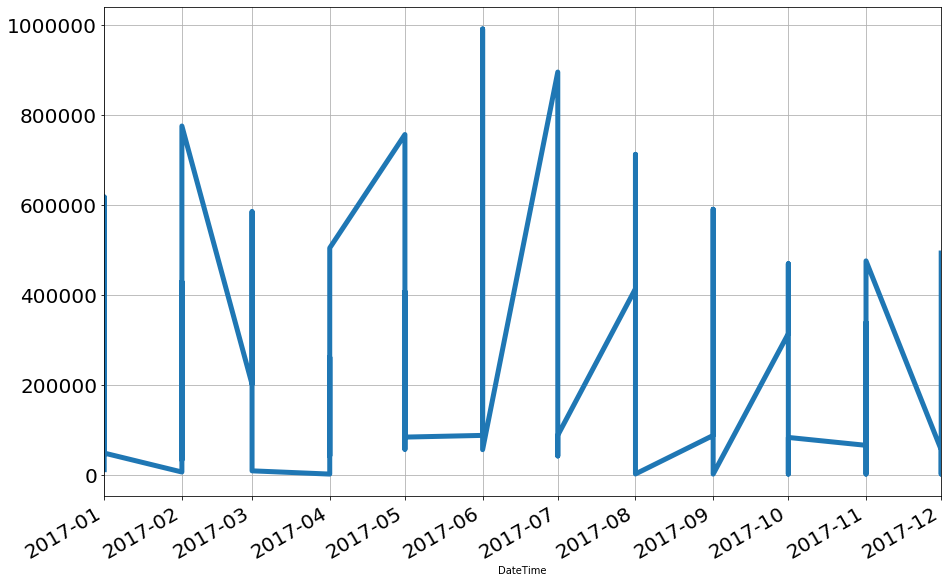

In [29]:
filtered_reservoir['Value'].astype(float).plot(figsize=(15,10), linewidth=5, fontsize=20, grid=True)

In [0]:
merged_precipitation_clean = merged_precipitation.drop(['Date', 'Month', 'Year', 'Sensor'], 1)

merged_reservoir_clean = merged_reservoir.drop(['Date', 'Month', 'Year', 'Sensor'], 1)
merged_snow_clean = merged_snow.drop(['Date', 'Month', 'Year', 'Sensor'], 1)

merged_precip_reservoir = pd.merge(merged_precipitation_clean, merged_reservoir_clean ,how='inner', on=['DateTime', 'Station'])
merged_snow_reservoir = pd.merge(merged_snow_clean, merged_reservoir_clean ,how='inner', on=['DateTime', 'Station'])
#print(merged_precip_reservoir.to_string())

In [43]:
merged_precip_reservoir.head()

,Value_x,DateTime,Station,County_x,Value_y,County_y
0,10.30,2005-01-01,CCH,SANTA BARBARA,188856.0,SANTA BARBARA
1,0.93,2005-01-01,CCH,SANTA BARBARA,188856.0,SANTA BARBARA
2,1.96,2005-01-01,CCH,SANTA BARBARA,188856.0,SANTA BARBARA
3,2.93,2005-01-01,CCH,SANTA BARBARA,188856.0,SANTA BARBARA
4,1.73,2005-01-01,CCH,SANTA BARBARA,188856.0,SANTA BARBARA


In [44]:
merged_snow_clean.head()

,Value,DateTime,Station,County
0,10.0,2005-01-01,ADM,MODOC
1,8.3,2005-02-01,ADM,MODOC
2,10.9,2005-03-01,ADM,MODOC
3,2.5,2005-04-01,ADM,MODOC
4,0.0,2005-05-01,ADM,MODOC


In [41]:
merged_all = pd.merge(merged_precip_reservoir, merged_snow_clean, how='inner', on=['DateTime', 'Station'])
merged_all.head()

,Value_x,DateTime,Station,County_x,Value_y,County_y,Value,County
0,13.20,2005-01-01,HNT,FRESNO,36699.0,FRESNO,27.0,FRESNO
1,13.32,2005-01-01,HNT,FRESNO,36699.0,FRESNO,27.0,FRESNO
2,13.92,2005-01-01,HNT,FRESNO,36699.0,FRESNO,27.0,FRESNO
3,14.40,2005-01-01,HNT,FRESNO,36699.0,FRESNO,27.0,FRESNO
4,14.64,2005-01-01,HNT,FRESNO,36699.0,FRESNO,27.0,FRESNO


In [42]:
merged_all.shape

(10824, 8)

In [47]:
merged_all['snow_value'] = merged_all['Value']
merged_all['percip_value'] = merged_all['Value_y']
merged_all['reservoir_value'] = merged_all['Value_x']
#merged_all.drop('Value', 'Value_y', 'Value_x', axis = 3)
merged_all.head()

,Value_x,DateTime,Station,County_x,Value_y,County_y,Value,County,snow_value,percip_value,reservoir_value
0,13.20,2005-01-01,HNT,FRESNO,36699.0,FRESNO,27.0,FRESNO,27.0,36699.0,13.20
1,13.32,2005-01-01,HNT,FRESNO,36699.0,FRESNO,27.0,FRESNO,27.0,36699.0,13.32
2,13.92,2005-01-01,HNT,FRESNO,36699.0,FRESNO,27.0,FRESNO,27.0,36699.0,13.92
3,14.40,2005-01-01,HNT,FRESNO,36699.0,FRESNO,27.0,FRESNO,27.0,36699.0,14.40
4,14.64,2005-01-01,HNT,FRESNO,36699.0,FRESNO,27.0,FRESNO,27.0,36699.0,14.64


# Correlation Plots

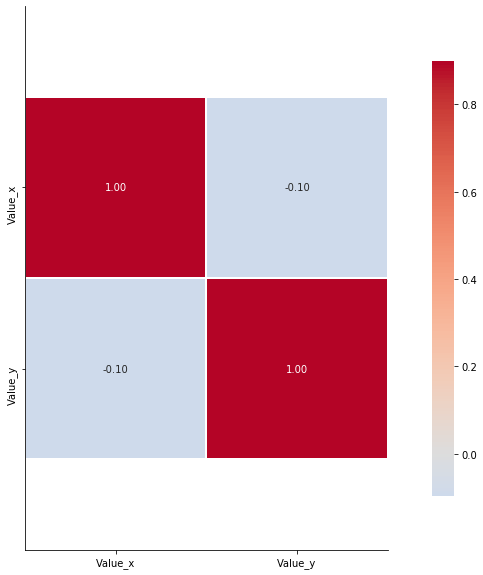

In [31]:
# Correlation between rain fall in general and rainfaill into the reservoir -- expect low correlation
corr = merged_precip_reservoir.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

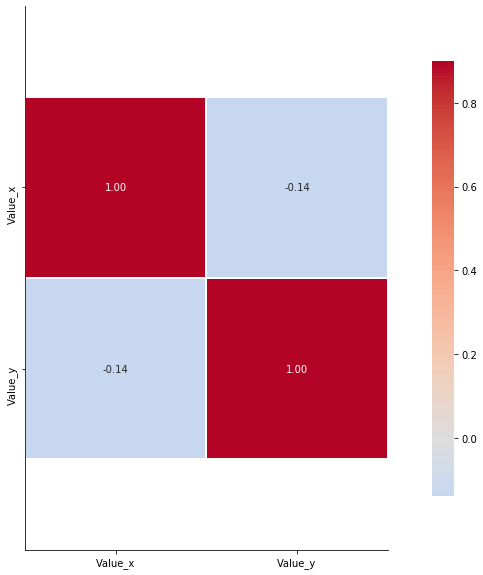

In [32]:
# correlation between snow fall in a county and rain fall into the reservoir -- expect low correlation
corr = merged_snow_reservoir.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [33]:
outflow = pd.read_csv('/content/drive/My Drive/cmpe256-data/outflow2.csv',low_memory=False)
outflow.head()

,Sensor,Date,Value
0,BER,200501,51.533333
1,BER,200502,53.166667
2,BER,200503,638.333333
3,BER,200504,684.700000
4,BER,200505,540.000000


In [34]:
country_reservoir = pd.read_csv('/content/drive/My Drive/cmpe256-data/ReservoirSensor-County.csv',low_memory=False)
country_reservoir.head()

,Station,County
0,KLM,SISKIYOU
1,GBR,SISKIYOU
2,IRG,SISKIYOU
3,CLK,MODOC
4,DWN,SISKIYOU


In [35]:
outflow.shape

(5471, 3)

In [36]:
country_reservoir['Station'] = country_reservoir['Station'].apply(lambda x: x.strip())
merged_outflow = pd.merge(outflow,country_reservoir,how='inner', left_on='Sensor', right_on='Station')
merged_outflow.head()

,Sensor,Date,Value,Station,County
0,BER,200501,51.533333,BER,NAPA
1,BER,200502,53.166667,BER,NAPA
2,BER,200503,638.333333,BER,NAPA
3,BER,200504,684.700000,BER,NAPA
4,BER,200505,540.000000,BER,NAPA


In [37]:
merged_outflow.shape

(5228, 5)

In [38]:
outflow.Sensor.unique()

array(['BER', 'BLB', 'BOC', 'BRD', 'BUC', 'BUL', 'CCH', 'CLE', 'CMN',
       'DNP', 'DON', 'ENG', 'FOL', 'HID', 'HTH', 'INV', 'ISB', 'KES',
       'LEW', 'MIL', 'MRT', 'NAT', 'NHG', 'NML', 'ORO', 'PAR', 'PNF',
       'PRS', 'SCC', 'SHA', 'STP', 'TRM', 'TUL', 'WHI', 'WRS'],
      dtype=object)

In [39]:
country_reservoir.Station.unique()

array(['KLM', 'GBR', 'IRG', 'CLK', 'DWN', 'CLE', 'LEW', 'RTD', 'PLL',
       'MNC', 'WRS', 'SLJ', 'NCA', 'KNT', 'BMP', 'LGT', 'APN', 'HNN',
       'BIO', 'USL', 'CHB', 'DLV', 'SAT', 'CVE', 'AST', 'LNG', 'LRA',
       'CYC', 'CRY', 'SPB', 'LFY', 'SNN', 'ATN', 'WHR', 'SLN', 'NCM',
       'TWT', 'CCH', 'GBL', 'MAT', 'CSI', 'PYM', 'BQC', 'CAS', 'PRU',
       'CGS', 'SGB', 'MHW', 'PRR', 'HMT', 'BRV', 'SVO', 'VLP', 'SGC',
       'RLC', 'DMV', 'VIL', 'STD', 'HDG', 'SKN', 'HNS', 'CUY', 'SVT',
       'MMR', 'ELC', 'JNN', 'MRR', 'MOR', 'BRT', 'LVD', 'SW3', 'LOT',
       'SHA', 'KES', 'WHI', 'MCO', 'IRC', 'BIT', 'PT7', 'PT6', 'BLB',
       'STG', 'EPK', 'MMW', 'ALM', 'ANT', 'BTV', 'BCL', 'DAV', 'FRD',
       'LGV', 'SLC', 'ORO', 'THD', 'TFR', 'TMT', 'TAB', 'BUL', 'RLL',
       'CFW', 'LVY', 'FMD', 'HHL', 'LON', 'EDN', 'UNV', 'ICH', 'SLB',
       'CPL', 'FOL', 'SIV', 'NAT', 'INV', 'CLA', 'BER', 'SOL', 'BTH',
       'LVQ', 'JNK', 'LWB', 'SLS', 'PAR', 'CMN', 'NHG', 'SPM', 'DON',
       'RLF', 'BRD',